[Reading classics - Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/ch11.ipynb)

In [1]:
%run ../input/python-recipes/dhtml.py
dhtml('Code Modules & Settings','#aa33ff',f2,fs8)

In [2]:
import warnings,time
warnings.filterwarnings('ignore')
import sklearn.datasets as sds
import sklearn.cluster as scl
import sklearn.metrics as sme
import sklearn.manifold as sma
import numpy as np,pandas as pd,pylab as pl
from IPython.core.magic import register_line_magic
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram

In [3]:
dhtml('Data','#aa33ff',f2,fs8)

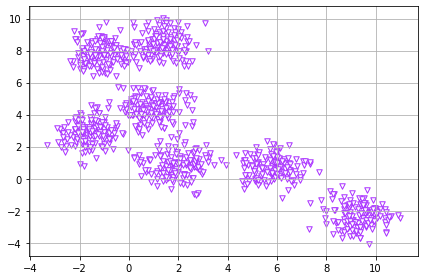

In [4]:
N=1000; n_clusters=7
X,y=sds.make_blobs(n_samples=N,n_features=2, 
                   centers=n_clusters,cluster_std=.7, 
                   shuffle=True,random_state=0)
pl.scatter(X[:,0],X[:,1],
           c='white',marker='v',
           edgecolor='#aa33ff',s=30)
pl.grid(); pl.tight_layout();

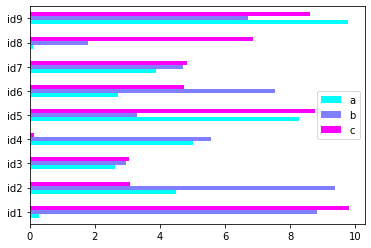

In [5]:
variables=['a','b','c']
labels=['id'+str(i) for i in range(1,10)]
X2=np.random.random_sample([9,3])*10
df=pd.DataFrame(X2,columns=variables,index=labels)
df.plot(kind='barh',cmap='cool');

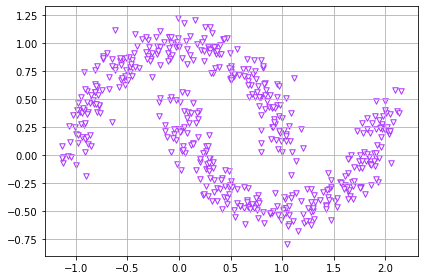

In [6]:
X3,y3=sds.make_moons(n_samples=500,noise=.1,
                     random_state=0)
pl.scatter(X3[:,0],X3[:,1],
           c='white',marker='v',
           edgecolor='#aa33ff',s=30)
pl.tight_layout(); pl.grid(); pl.show()

In [7]:
digits=sds.load_digits()
X4,y4=digits.data,digits.target
X4.shape,y4.shape

((1797, 64), (1797,))

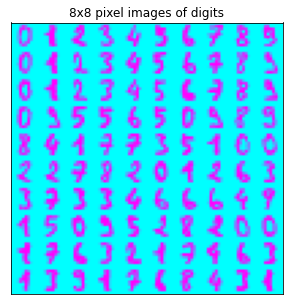

In [8]:
n=10; img=np.zeros((10*n,10*n))
for i in range(n): 
    for j in range(n): 
        img[(10*i+1):(10*i+9),
            (10*j+1):(10*j+9)]=X4[i*n+j]\
        .reshape((8,8))
pl.figure(figsize=(5,5))
pl.imshow(img,cmap=pl.cm.cool)
pl.title('8x8 pixel images of digits')
pl.xticks([]); pl.yticks([]);

In [9]:
dhtml('Clustering','#aa33ff',f2,fs8)

In [10]:
km,y_km=[],[]
@register_line_magic
def kmeans_clusters(c):
    n_clusters=int(c)
    global km,y_km
    km=scl.KMeans(n_clusters=n_clusters,
                  init='k-means++',n_init=10,
                  max_iter=500,tol=1e-04,
                  random_state=0)
    y_km=km.fit_predict(X)

In [11]:
%kmeans_clusters 7

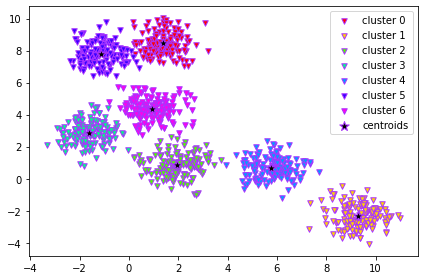

In [12]:
for i in range(n_clusters):
    color=pl.cm.hsv(float(i)/n_clusters)
    pl.scatter(X[y_km==i,0],X[y_km==i,1],
               s=30,color=color,marker='v',
               edgecolor='#aa33ff',
               label='cluster %d'%i)
pl.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=100, marker='*',c='black',
           edgecolor='#aa33ff',label='centroids')
pl.legend(scatterpoints=1); pl.tight_layout();

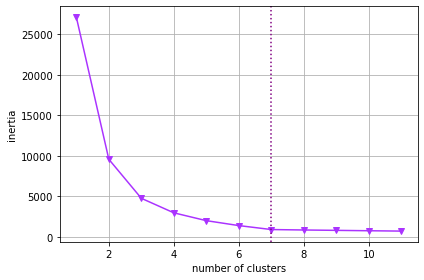

In [13]:
iner=[]
for i in range(1,12):
    km=scl.KMeans(n_clusters=i,init='k-means++',
                  n_init=10,max_iter=500, 
                  random_state=0)
    km.fit(X);iner.append(km.inertia_)
pl.plot(range(1,12),iner,marker='v',c='#aa33ff')
pl.xlabel('number of clusters')
pl.axvline(7,color='purple',linestyle=':')
pl.ylabel('inertia')
pl.tight_layout(); pl.grid()

In [14]:
@register_line_magic
def silhouette_plots(n):
    n_clusters=int(n); labels=np.unique(y_km)
    svalues=sme.\
    silhouette_samples(X,y_km,metric='euclidean')
    y_ax_lower,y_ax_upper=0,0; yticks=[]
    for i,c in enumerate(labels):
        c_svalues=svalues[y_km==c]
        c_svalues.sort()
        y_ax_upper+=len(c_svalues)
        color=pl.cm.cool(float(i)/n_clusters)
        pl.barh(range(y_ax_lower,y_ax_upper),
                c_svalues,height=1., 
                edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2.)
        y_ax_lower+=len(c_svalues)
    savg=np.mean(svalues)
    pl.axvline(savg, color="red",linestyle="--") 
    pl.yticks(yticks,labels+1)
    pl.ylabel('clusters')
    pl.xlabel('silhouette coefficients')
    pl.tight_layout(); pl.show()

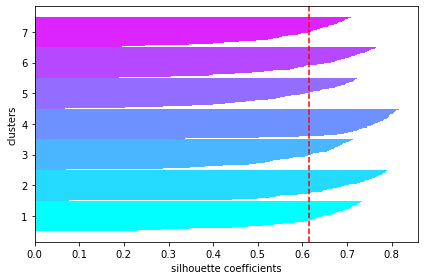

In [15]:
#well-fitted cluster amount
%kmeans_clusters 7
%silhouette_plots 7

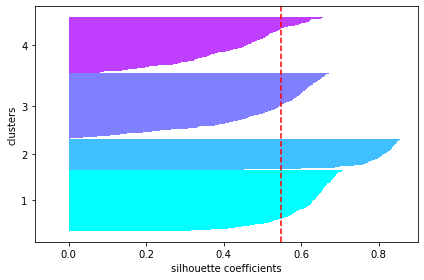

In [16]:
#bad-fitted cluster amount
%kmeans_clusters 4
%silhouette_plots 4

In [17]:
dhtml('Clusters as a Hierarchical Tree','#aa33ff',f2,fs8)

In [18]:
ac=scl.AgglomerativeClustering(n_clusters=3, 
                               affinity='euclidean', 
                               linkage='complete')
ac_labels=ac.fit_predict(X2)
print('Cluster labels: %s'%ac_labels)

Cluster labels: [0 1 1 1 2 1 1 0 2]


In [19]:
@register_line_magic
def dist_clusters(method):
    row_dist=pdist(df,metric='euclidean')
    if method=='False':
        row_dist=squareform(row_dist)
    row_clusters=linkage(row_dist,
                         method='complete',
                         metric='euclidean')
    c=row_clusters.shape[0]
    rc=pd.DataFrame(row_clusters,
                    columns=['row label 1','row label 2',
                             'distance','n_items'],
                    index=['cl%d'%(i+1) 
                           for i in range(c)])
    display(rc)
    fig=pl.figure(figsize=(8,8))
    axd=fig.add_axes([.1,.1,.31,.6])
    d=dendrogram(row_clusters,orientation='left',
                 labels=labels)
    df_cl=df.iloc[d['leaves'][::-1]]
    axd.set_xticks([]); axd.set_yticks([])
    for i in axd.spines.values():
        i.set_visible(False)
    axm=fig.add_axes([.2,.1,.6,.6])
    cax=axm.matshow(df_cl,interpolation='nearest',
                    cmap='cool')
    fig.colorbar(cax)
    ac=[str(ac_labels[int(el[2])-1])+'-'+el 
        for el in list(df_cl.index)]
    axm.set_xticklabels(['']+list(df_cl.columns))
    axm.set_yticklabels(['']+ac)
    if method=='False': pl.title('incorrect')
    else: pl.title('correct')
    pl.show()

,row label 1,row label 2,distance,n_items
cl1,2.0,6.0,5.999513,2.0
cl2,4.0,8.0,6.318926,2.0
cl3,1.0,5.0,6.334199,2.0
cl4,3.0,9.0,10.264864,3.0
cl5,11.0,12.0,11.286198,5.0
cl6,0.0,7.0,12.339465,2.0
cl7,13.0,14.0,17.109201,7.0
cl8,10.0,15.0,17.642307,9.0


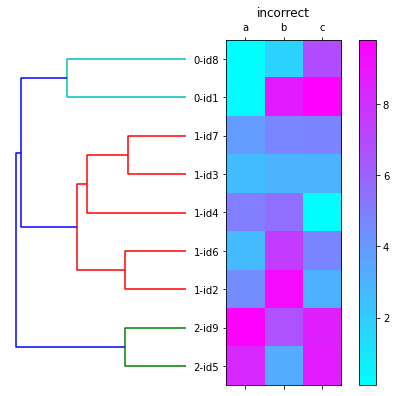

In [20]:
%dist_clusters False

,row label 1,row label 2,distance,n_items
cl1,2.0,6.0,2.803752,2.0
cl2,1.0,5.0,3.040216,2.0
cl3,4.0,8.0,3.737361,2.0
cl4,3.0,9.0,4.892133,3.0
cl5,10.0,12.0,6.701208,5.0
cl6,0.0,7.0,7.621489,2.0
cl7,11.0,13.0,9.823843,7.0
cl8,14.0,15.0,11.238004,9.0


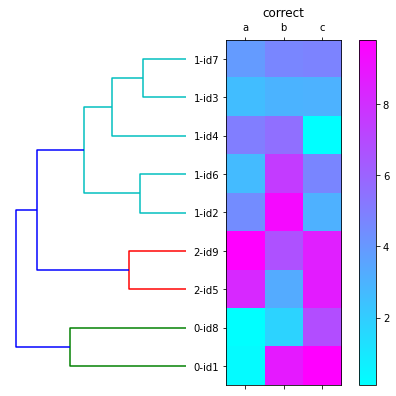

In [21]:
%dist_clusters True

In [22]:
dhtml('DBSCAN, OPTICS, & Others','#aa33ff',f2,fs8)

In [23]:
n_clusters=2
km=scl.KMeans(n_clusters=n_clusters,random_state=0)
y3_km=km.fit_predict(X3)
ac=scl.AgglomerativeClustering(n_clusters=n_clusters,
                               affinity='euclidean',
                               linkage='complete')
y3_ac=ac.fit_predict(X3)
sp=scl.SpectralClustering(n_clusters=n_clusters)
y3_sp=sp.fit_predict(X3)
db=scl.DBSCAN(eps=.2,min_samples=15,
              metric='euclidean')
y3_db=db.fit_predict(X3)
op=scl.OPTICS(eps=.2,min_samples=30)
y3_op=op.fit_predict(X3)
cl=['KMeans','Agglomerative','Spectral',
    'DBSCAN','OPTICS']
py3=[y3_km,y3_ac,y3_sp,y3_db,y3_op]

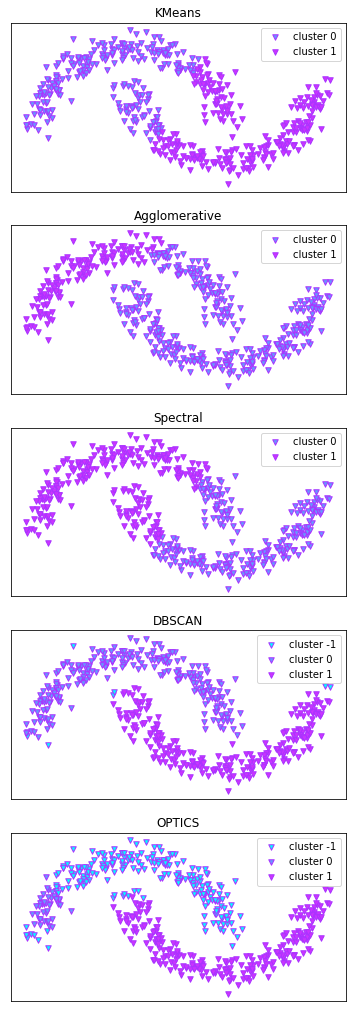

In [24]:
f,ax=pl.subplots(5,1,figsize=(6,18))
for c in range(5):
    for i in np.unique(py3[c]):
        color=pl.cm.cool(.4*(i+1))
        ax[c].scatter(X3[py3[c]==i,0],
                      X3[py3[c]==i,1],
               s=30,color=color,marker='v',
               edgecolor='#aa33ff',
               label='cluster %d'%i)
    ax[c].legend(scatterpoints=1)
    ax[c].set_xticks([]); ax[c].set_yticks([])
    ax[c].set_title(cl[c]); 

In [25]:
dhtml('TSNE & Clustering','#aa33ff',f2,fs8)

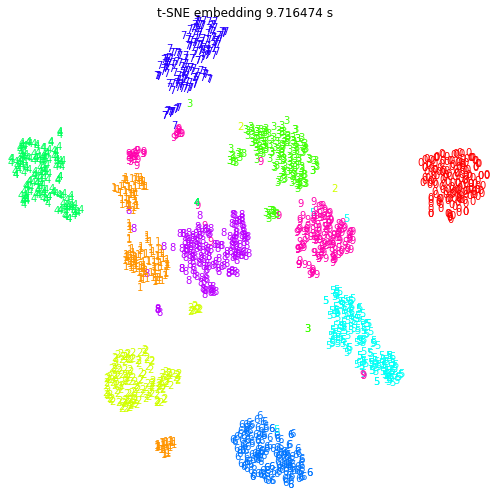

In [26]:
t0=time.time()
X4_emb=sma.TSNE(n_components=2,learning_rate=700.)\
.fit_transform(X4)
x_min,x_max=np.min(X4_emb,0),np.max(X4_emb,0)
X4_emb=(X4_emb-x_min)/(x_max-x_min)
f,ax=pl.subplots(1,figsize=(7,7))
pl.axis("off")
for i in range(X4_emb.shape[0]):
    pl.text(X4_emb[i,0],X4_emb[i,1],str(y4[i]),
            color=pl.cm.hsv(y4[i]/10.))
pl.title("t-SNE embedding %f s"%(time.time()-t0))
pl.tight_layout();

In [27]:
n_clusters=10
km=scl.KMeans(n_clusters=n_clusters,
              init='k-means++',n_init=10,
              max_iter=500,tol=1e-05,
              random_state=0)
y4_km=km.fit_predict(X4_emb)
labs=[int(np.median(y4[np.where([y4_km==i])[1]]))
      for i in range(10)]
rd=dict(zip(list(range(10)),labs))
cl=np.array([rd.get(x,x) for x in y4_km],
                dtype='int8')

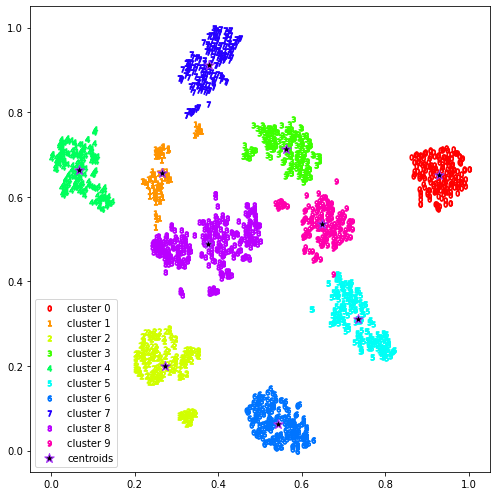

In [28]:
f,ax=pl.subplots(1,figsize=(7,7))
for i in range(n_clusters):
    color=pl.cm.hsv(float(i)/n_clusters)
    pl.scatter(X4_emb[cl==i,0],
               X4_emb[cl==i,1],
               s=30,color=color,
               marker='$%d$'%i,
               label='cluster %d'%i)
pl.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=100, marker='*',c='black',
           edgecolor='#aa33ff',label='centroids')
pl.legend(scatterpoints=1); pl.tight_layout();

In [29]:
dhtml('Interactive Experiments','#aa33ff',f2,fs8)

In [30]:
%%html
<div id='smcell' style="border:10px double white; 
     width:680px; height:850px; overflow:auto; 
     padding:10px; background-color:ghostwhite">
<iframe id='if1' 
src="https://olgabelitskaya.gitlab.io/kaggle/kaggle_smc04.html" 
width="630" height="800"/></div>